In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip

--2025-04-14 13:18:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip       [   <=>              ]   1.47M  3.12MB/s    in 0.5s    

2025-04-14 13:18:30 (3.12 MB/s) - ‘AirQualityUCI.zip’ saved [1543989]

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load the data
data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

In [5]:
# Data preprocessing
data = data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)']]
data = data.dropna()

In [6]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
# train test split
train_data = scaled_data[:-30]
test_data = scaled_data[-30:]


In [8]:
# VARMAX model
model = VARMAX(train_data, order=(1, 1))  # (p,q)
model_fit = model.fit(disp=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
predictions = model_fit.forecast(steps=len(test_data))

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

In [10]:
# Evaluate
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_data), predictions))
print(f"RMSE: {rmse}")

RMSE: 78.56179052950445


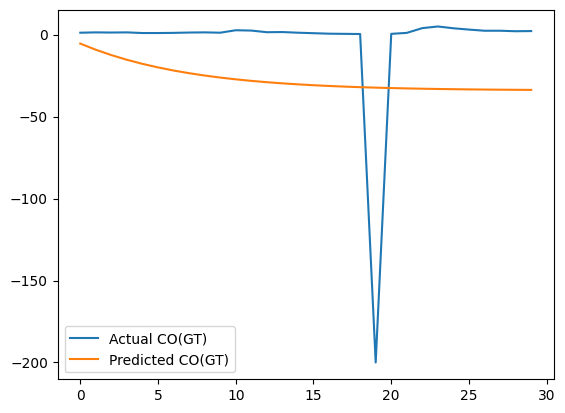

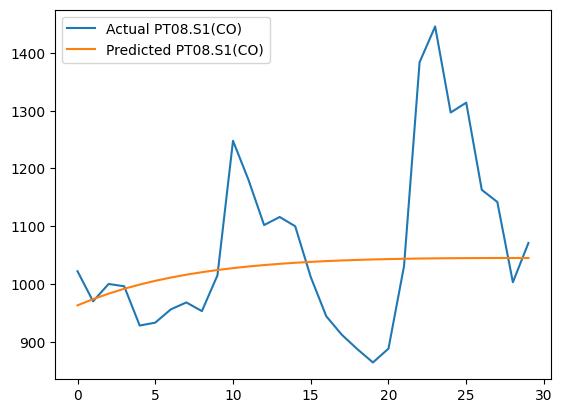

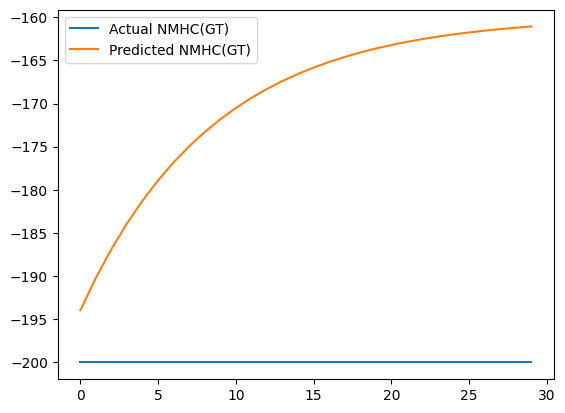

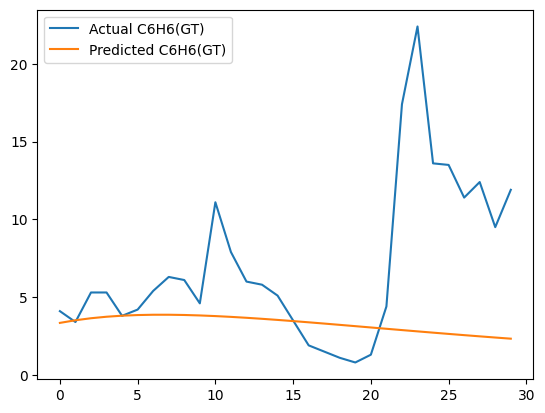

In [17]:
import matplotlib.pyplot as plt


for i in range(len(data.columns)):
    plt.plot(
        scaler.inverse_transform(test_data)[:, i],
        label=f'Actual {data.columns[i]}'
        )
    plt.plot(
        predictions[:, i],
        label=f'Predicted {data.columns[i]}'
        )
    plt.legend()
    plt.show()
